In [50]:
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline 

In [51]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0.5, 0, 'Height')

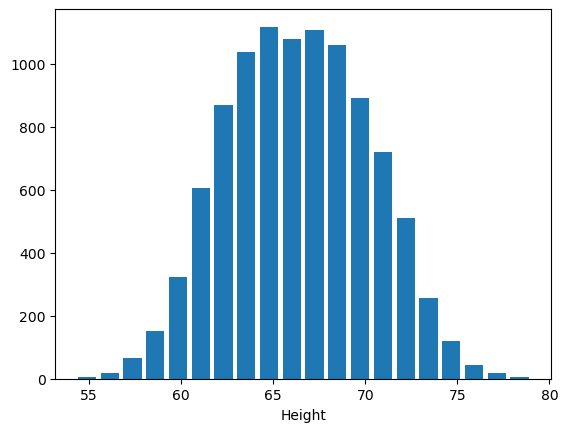

In [52]:
plt.hist(df.Height,bins=20,rwidth=0.8)
plt.xlabel('Height')

Text(0.5, 0, 'Weight')

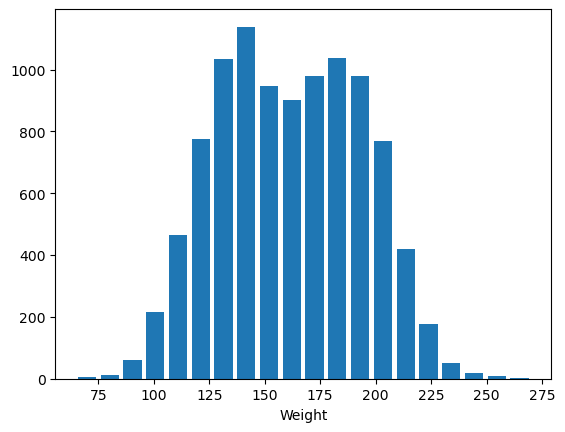

In [53]:
plt.hist(df.Weight,bins=20,rwidth=0.8)
plt.xlabel('Weight')

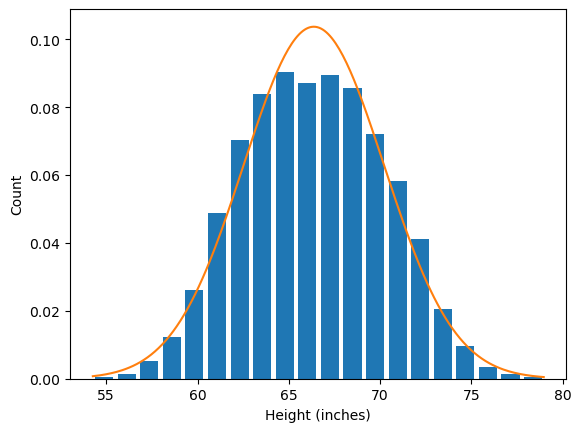

In [54]:
from scipy.stats import norm 

plt.hist(df.Height,bins=20,rwidth=0.8,density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
import numpy as np  
rng = np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.Height.mean(),df.Height.std()))


In [55]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [56]:
upper_limit = df.Height.mean()+3*df.Height.std()
upper_limit

77.91014411714094

In [57]:
lower_limit = df.Height.mean()-3*df.Height.std()
lower_limit

54.82497539250154

In [58]:
df[(df.Height>upper_limit) | (df.Height<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


Text(0, 0.5, 'Height')

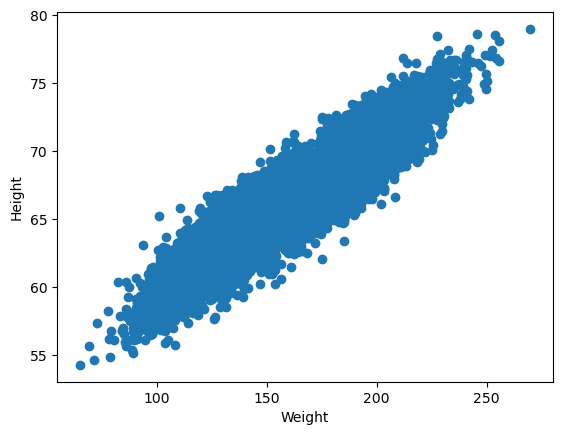

In [59]:
plt.scatter(df.Weight,df.Height)
plt.xlabel('Weight')
plt.ylabel('Height')

In [60]:
df_no_outlier_std_dev = df[(df.Height<upper_limit)&(df.Height>lower_limit)]

In [61]:
df_no_outlier_std_dev.shape

(9993, 3)

In [62]:
df.shape[0] - df_no_outlier_std_dev.shape[0]

7

In [63]:
df['zscore'] = (df.Height - df.Height.mean())/df.Height.std()

In [64]:
df.sample(5)

,Gender,Height,Weight,zscore
3749,Male,70.533551,212.435238,1.082771
7518,Female,64.753141,141.389346,-0.419599
3118,Male,71.834466,208.693236,1.420888
2542,Male,67.619487,194.518819,0.325385
8702,Female,65.060095,149.725493,-0.339819


In [65]:
df[(df['zscore']>3) | (df['zscore']<-3)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [66]:
df_new = df[(df['zscore']<3) & (df['zscore']>-3)]

In [67]:
df_new.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [68]:
df.shape[0]-df_new.shape[0]

7

(array([   8.,   32.,   71.,  164.,  313.,  574.,  797.,  919., 1013.,
        1002., 1006., 1025.,  930.,  727.,  632.,  388.,  225.,  104.,
          37.,   26.]),
 array([-2.98732897, -2.69267929, -2.39802961, -2.10337992, -1.80873024,
        -1.51408056, -1.21943087, -0.92478119, -0.63013151, -0.33548183,
        -0.04083214,  0.25381754,  0.54846722,  0.84311691,  1.13776659,
         1.43241627,  1.72706595,  2.02171564,  2.31636532,  2.611015  ,
         2.90566469]),
 <BarContainer object of 20 artists>)

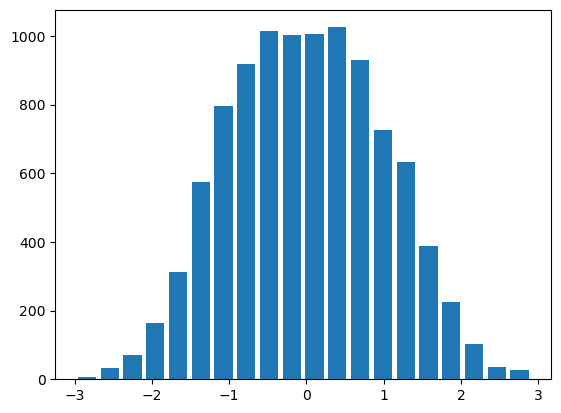

In [69]:
plt.hist(df_new.zscore,bins=20,rwidth=0.8)

In [70]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df[['Height']])

(array([   5.,   18.,   66.,  152.,  322.,  604.,  870., 1036., 1117.,
        1079., 1108., 1059.,  891.,  721.,  510.,  255.,  120.,   43.,
          19.,    5.]),
 array([-3.14618407, -2.82471994, -2.50325581, -2.18179167, -1.86032754,
        -1.5388634 , -1.21739927, -0.89593514, -0.574471  , -0.25300687,
         0.06845726,  0.3899214 ,  0.71138553,  1.03284967,  1.3543138 ,
         1.67577793,  1.99724207,  2.3187062 ,  2.64017034,  2.96163447,
         3.2830986 ]),
 <BarContainer object of 20 artists>)

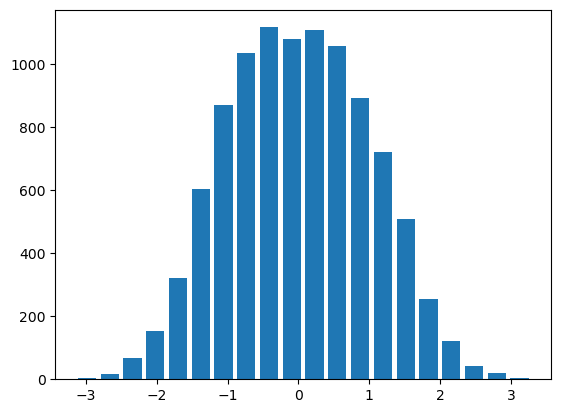

In [71]:
plt.hist(df_scaled,bins=20,rwidth=0.8)

In [75]:
df_new.drop('zscore',axis=1,inplace=True)
df_new.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13244\2273725222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop('zscore',axis=1,inplace=True)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [97]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df_new[['Weight']]
y = df_new['Height']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)


In [101]:
type(y_train)

pandas.core.series.Series

In [102]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [103]:
reg.score(X_test,y_test)

0.8576334836203248

In [104]:
from sklearn.ensemble import RandomForestRegressor
reg_2 = RandomForestRegressor(n_estimators=100)
reg_2.fit(X_train,y_train)
reg_2.score(X_test,y_test)

0.7872725359662883

In [107]:
test = np.linspace(X.min(),X.max(),100)

c:\Anaconda\envs\dul01\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


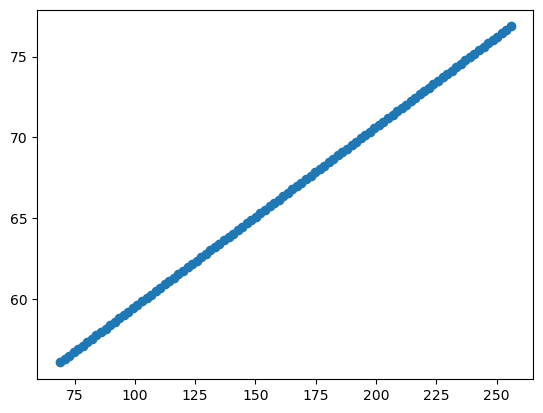

In [108]:
plt.scatter(test,reg.predict(test))

c:\Anaconda\envs\dul01\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


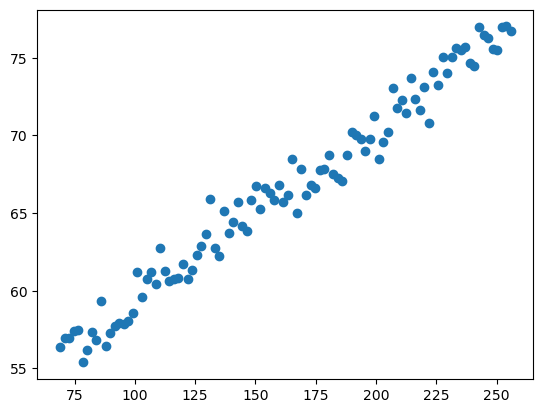

In [109]:
plt.scatter(test,reg_2.predict(test))